In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *
import scipy.optimize as opt
import notebooks.choke_steam as chst

## Статья Альсафран
Расчеты ведутся на основе методики E.M.Al-Safran (Kuwait University) и M.Kelkar (The University of Tulsa)

статья SPE: Predictions of Two-Phase Critical-Flow Boundary and Mass-Flow Rate Across Chokes

https://www.onepetro.org/journal-paper/SPE-109243-PA

В отличии от методик, используемых в настоящее время,  модель учитывает проскальзывание между жидкой и газовой фазами при прохождении через штуцер. Прогнозирует границу перехода с докритического на критический режим, учитывая эффект проскальзывания.

В статье указано, что давление должно быть в Па, изменил на кПа. с Па получались слишком большие значения расхода.

Модель соответствует модели Перкинса, когда нет проскальзывания между фазами (R=1).

Способна предсказывать границу перехода с критического на докритический режим со средней погрешностью 5,2% со стандартным отклонением 15,5%.

Определяет массовый критический и докритический расход со средней погрешностью 1,2% со стандартным отклонением 15%.

Расход измерялся от 3168 до 78768 кг/чаc , давление 6.9-432 атм, температура 38-104 С, диаметр штуцера 6,35-38,1 мм

#### Модель имеет следующие ограничения:

- Отношение диаметра штуцера к диаметру трубы в четвертой степени приравнивается к нулю 

### $ (\frac{d_{choke}}{d_{pipe}})^4=0 $

- Сухость насыщенного пара считается потоянной


- Жидкая фаза несжимаема


- Газовая фаза расширяется политропически (удельная теплоемкость газа остается постоянной)

#### Формула для расчета массового расхода по методике AльСафран

$$w^2=\frac{С*A_2^2*p_1*[\alpha*(1-r)+\frac{n}{n-1}*(1-r^{\frac{n-1}{n}})]}{x_g*v_{g1}*(r^{-1/n}+\alpha)^2*[x_g+\frac{1}{R}*(1-x_g)]} $$

#### где:

 $$n=\frac{f_g*k*C_{vg}+(1-f_g)*C_{L}}{f_g*C_{vg}+(1-f_g)*C_{L}}$$

 $$\alpha = \frac{R*(1-x_g)*v_L}{x_g*v_{g1}}$$
 
 $$R=\sqrt{(1+x_g*(\frac{\rho_L}{\rho_g}-1)}*(1+0.6*e^{-5*x_g})$$
 
 $$C=288*g_c*C_d^2 $$
 
 $C_d$ - коэффициент разряда штуцера (дисчарч коэффициент)
 
 $x_g$ - сухость пара или массовая доля газа
 
 $\rho_L$ - плотность жидкости
 
 $\rho_g$ - плотность газа (пара)
 
 $v_L$ - удельный объем жидкости 
 
 $v_{g1}$ - удельный объем гзв (пара)
 
 $k$ - показатель адиабаты
 
 $C_{vg}$ - удельная изобарная теплоемкость газа (пара)
 
 $C_{L}$ - удельная изобарная теплоемкость жидкости
  
 $p_1$ - давление перед штуцером

 $p_2$ - давление за штуцером
 
 $$r_с^{1-1/n}=\frac{\alpha*(1-r_c)+\frac{n}{n-1}}{\frac{n}{n-1}+\frac{n}{2}*(1+\alpha*r_c^{1/n})^2} $$

 при $\frac{p_2}{p_1}>r_с$ докритический режим $r=\frac{p_2}{p_1}$ 
 
 при $\frac{p_2}{p_1}<r_с$ критический режим $r=r_c$ 
 



## Статья Чиена (Миллера)
Расчеты ведутся на основе методики Chien, Sze-Foo, Texaco Inc. и Schrodt, J.L.G., Texaco Inc.

Статья SPE https://www.onepetro.org/journal-paper/SPE-24832-PA, в основе которой лежит книга Flow measurement engineering handbook (автор Richard W. Miller), а именно глава "THEORETICAL FLOW-RATE EQUAТIONS" стр. 377-397.

Статья не рассматривает вместе критический и докритический режим, поэтому в расчетах нет границы перехода и используется только модель докритического режима.

Эксперименты проводились в трубе диаметром 49.276 мм, при давлении пара от 28 до 55 атм, сухости пара от 19 до 95%, массовом расходе от 900 до 6800 кг/час, диаметр штуцера составлял 6.35 мм. 

Эксперименты показали ошибку не более, чем 4.75%.

В статье не говорится о возможности использования модели для ГЖС или других жидкостей или газов кроме насыщенного пара.

#### Формула для расчета массового расхода по методике Чиена(Миллера)
$$w=3.512407*10^{-5}*\frac{C*Y_1*d_c^2}{\sqrt{1-\beta^4}}\sqrt{\frac{\vartriangle p}{v_1}}$$

#### где:
$C$ -  коэффициент разряда штуцера (дисчарч коэффициент)

$Y_1$ - коэффициент расширения пара

$d_c$ - диаметр штуцера

$d_p$ - диаметр трубы

$\beta=\frac{d_o}{d_p} $

$p_1$ - давление перед штуцером

$p_2$ - давление за штуцером

$\vartriangle p=p_1-p_2 $

$v_1$ - удельный объем смеси

$$v_1=A*v_{fg}*(\frac{X}{100})^B+v_f$$

$v_{fg}$ - удельный объем пара(газа)

$v_f$ - удельный объем воды(жидкости)

$X$ - сухость пара

$A,B$ - эмпирические коэффициенты из статьи 


## Статья Перкинса


Расчеты ведутся на основе методики T.K. Perkins, Arco E&P Technology

статья SPE: Critical and Subcritical Flow of Multiphase Mixtures Through Chokes

https://www.onepetro.org/journal-paper/SPE-20633

Модель позволяет считать и учитывать температуру и давление в штуцере, расчитывать границу перехода с критического на докритический режим с помощью этого давления и температуры.

Проводились испытания с потоками воздух/вода, воздух/керосин, природный газ, природный газ/нефть, природный газ/вода, вода. Испытания дали среднюю погрешность 11.46 % с стандартным отклонением 15,4%. Лучшие результаты дали: природный газ/вода на докритическом режиме (погрешность 6.21%), вода на докритическом режиме (8.47%) и воздух/вода на докритическом режиме (7.39%)

В статье не рассматриваются системы связанные с конденсацией газовой фазы (например насыщенный пар).

Не рассматривались условия, которые приводят давление в штуцере меньше, чем давление паров в водной фазе.

Поток смеси является изоэнтропическим (адиабатический и без потерь на трение).

Рассчитывается теоретический расход, для нахождения фактического необходимо домножить а коэффициент K=0.78-0.9, который является эмпирическим.

В отличии от других методов, удельные теплоемкости считаются для среднего давления между давлением перед штуцером и давлением в штуцере, а не просто для давления перед штуцером


#### Формула для расчета теоретического изоэнтропического массового расхода смеси по методике Перкинса


$$w_i=A_2*\sqrt{288*g_c*\frac{p_1}{v_1}*\frac{\lambda*(1-{p_r}^{\frac{n-1}{n}})+\alpha_1*(1-p_r)}{[1-(\frac{A_2}{A_1})^2*(\frac{fg+\alpha_1}{fg*p_r^{-1/n}+\alpha_1})^2]*(fg*p_r^{-1/n}+\alpha_1)^2}} $$


### где
$fg$ - весовая доля газа в потоке

$fo$ - весовая доля нефти в потоке

$fw$ - весовая доля воды в потоке

$M_m$ - молекулярный вес

$z$ - коэффициент сжимаемости газа

$F$ - показатель адиабаты $c_p/c_v$

$\rho_g$ - плотность пара

$\rho_o$ - плотность нефти

$\rho_w$ - плотность воды

$v_1$ -  удельный объем

$T$ - температура

$R$ - универсальная газовая постоянная

$p_1$ - давление перед штуцером

$p_2$ - давление в штуцере

$p_3$ - давление  за штуцером

$d_1$ - диаметр трубы до штуцера

$d_2$ - диаметр штуцера

$A_1$ - площадь трубы $A_1=\frac{\pi*d_1^2}{4}$

$A_2$ - площадь штуцера $A_2=\frac{\pi*d_2^2}{4}$

$C_{vg}$ - теплоемкость при постоянном объеме для газа

$C_{vo}$ - теплоемкость при постоянном объеме для нефти 

$C_{vw}$ - теплоемкость при постоянном объеме для воды 

 $$n=\frac{f_g*F*C_{vg}+f_o*C_{vo}+f_w*C_{vw}}{f_g*C_{vg}+f_o*C_{vo}+f_w*C_{vw}}$$

 $$\lambda=f_g+\frac{(f_g*C_{vg}+f_o*C_{vo}+f_w*C_{vw})*M_m}{z*R}$$

 $$\alpha_1 = \frac{1}{v_1}*(\frac{f_o}{\rho_o}+\frac{f_w}{\rho_w})$$

 $ p_r=\frac{p_2}{p_1}$ при   $p_2 > p_3 $ - критический режим

 $ p_r=\frac{p_3}{p_1}$ при  $p_3 > p_2 $ - докритический режим



#### Расчетный массовый расход вычисляется по формуле:
$$w_c=w_i*K$$

$ K=\frac{w_a}{w_i} $

$w_a$ - фактический массовый расход

#### Список функций представленных в файле для проведения расчетов:

* w_saturatedsteam_choke_kghr(p1_atm, p2_atm, X, d0_mm=5, d1_mm=100) Расчет расхода насыщенного пара через штуцер по методике Чиена (Миллера)
  
  
* p_saturatedsteam_upchoke_atm(w_kghr,p2_atm,X,d0_mm=5, d1_mm=100) Расчет давления насыщенного пара перед клапаном по методике Чиена (Миллера)


* p_saturatedsteam_downchoke_atm( w_kghr, p1_atm, X,d0_mm=5,d1_mm=100) Расчет давления на выходе от давления на входе при разных расходах по методике Чиена (Миллера)


* f_saturatedsteam_difpressurechoke_atm(w_kghr,p1_atm,X,d0_mm=5, d1_mm=100) Расчет разницы давлений до и после штуцера насыщенного пара по методике Чиена (Миллера)


* q_saturatsteam_choke_kghr(p1_atm, p2_atm, xg, dchoke_mm=5) Расчет расхода насыщенного пара через штуцер по методике Альсафран 


* q_critsaturatsteam_choke_kghr(p1_atm, xg, dchoke_mm=5) Расчет критического расхода насыщенного пара через штуцер по методике Альсафран 


* p_saturatsteam_upchoke_atm(w_kghr,p2_atm,xg,dchoke_mm=5) Расчет давления насыщенного пара перед клапаном по методике Альсафран


* p_saturatsteam_downchoke_atm(w_kghr,p1_atm,xg,dchoke_mm=5) Расчет давления насыщенного пара перед клапаном по методике Альсафран


* f_saturatsteam_difpressurechoke_atm(w_kghr,p1_atm,xg,dchoke_mm=5) Расчет разницы давлений до и после штуцера насыщенного пара по методике Aльсафран


* W_ssteam_choke_kghr(p1_atm,p2_atm, fg, T_C=20, d2_mm=5) Расчет расхода насыщенного пара через штуцер по методике Перкинса


* W_critssteam_choke_kghr(p1_atm, fg, T_C=20, d2_mm=5) Расчет критического расхода насыщенного пара через штуцер по методике Перкинса


* p_ssteam_upchoke_atm(w_kghr,p2_atm,fg,d2_mm=5) Расчет давления насыщенного пара перед клапаном по методике Перкинса


* p_ssteam_downchoke_atm(w_kghr,p1_atm,fg,d2_mm=5) Расчет давления насыщенного пара перед клапаном по методике Перкинса


* f_ssteam_difpressurechoke_atm(w_kghr,p1_atm,fg,d2_mm=5) Расчет разницы давлений до и после штуцера насыщенного пара по методике Перкинса

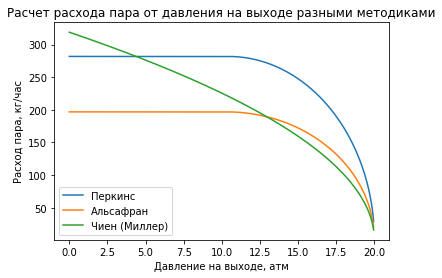

In [9]:
p1_atm=20
p2_a=np.arange(0,p1_atm,0.05)
q1=np.array([])
q2=np.array([])
q3=np.array([])
for p2_atm in p2_a:
    p1=chst.w_saturatedsteam_choke_kghr(p1_atm, p2_atm, 1, d0_mm=5, d1_mm=100)
    p2=chst.q_saturatsteam_choke_kghr(p1_atm, p2_atm, 1, dchoke_mm=5)
    p3=chst.W_ssteam_choke_kghr(p1_atm,p2_atm, 1, T_C=20, d2_mm=5)
    q1=np.append(q1,p1)
    q2=np.append(q2,p2)
    q3=np.append(q3,p3)
plt.plot(p2_a,q3,label='Перкинс') 
plt.plot(p2_a,q2,label='Альсафран')
plt.plot(p2_a,q1,label='Чиен (Миллер)')
plt.title('Расчет расхода пара от давления на выходе разными методиками')
plt.ylabel('Расход пара, кг/час')
plt.xlabel('Давление на выходе, атм')
plt.legend()
plt.show()

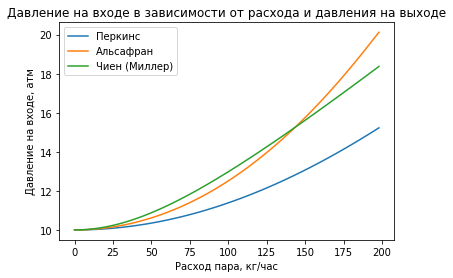

In [4]:
'Построение графика "Давление на входе в зависимости от расхода и давления на выходе"'
p2_atm=10
w_kghr_a=np.arange(0,200,2) # расход, кг/час для которого находится давление на выходе
q1=np.array([])
q2=np.array([])
q3=np.array([])        
for w_kghr in w_kghr_a:
    p1=chst.p_saturatedsteam_upchoke_atm(w_kghr,p2_atm,1) 
    p2=chst.p_saturatsteam_upchoke_atm(w_kghr,p2_atm,1)
    p3=chst.p_ssteam_upchoke_atm(w_kghr,p2_atm,1)
    q1=np.append(q1,p1)
    q2=np.append(q2,p2)
    q3=np.append(q3,p3)
plt.plot(w_kghr_a,q3,label='Перкинс') 
plt.plot(w_kghr_a,q2,label='Альсафран')
plt.plot(w_kghr_a,q1,label='Чиен (Миллер)')
plt.title('Давление на входе в зависимости от расхода и давления на выходе')
plt.xlabel('Расход пара, кг/час')
plt.ylabel('Давление на входе, атм')   
plt.legend()
plt.show()  

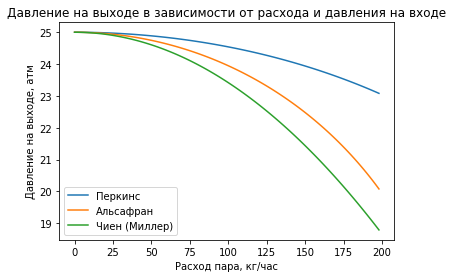

In [7]:
'Построение графика "Давление на выходе в зависимости от расхода и давления на входе"'
p1_atm=25
w_kghr_a=np.arange(0,200,2) # расход, кг/час для которого находится давление на выходе
q1=np.array([])
q2=np.array([])
q3=np.array([])        
for w_kghr in w_kghr_a:
    p1=chst.p_saturatedsteam_downchoke_atm( w_kghr, p1_atm,1) 
    p2=chst.p_saturatsteam_downchoke_atm(w_kghr,p1_atm,1)
    p3=chst.p_ssteam_downchoke_atm(w_kghr,p1_atm,1)
    q1=np.append(q1,p1)
    q2=np.append(q2,p2)
    q3=np.append(q3,p3)
plt.plot(w_kghr_a,q3,label='Перкинс') 
plt.plot(w_kghr_a,q2,label='Альсафран')
plt.plot(w_kghr_a,q1,label='Чиен (Миллер)')
plt.title('Давление на выходе в зависимости от расхода и давления на входе')
plt.xlabel('Расход пара, кг/час')
plt.ylabel('Давление на выходе, атм')   
plt.legend()
plt.show()  